# Generating Multiple Images by text

The advantage of API usage is that it is possible to run multiple generation all at once.

Here we track back to how to work with text, preprocess and clean it then start with the image generation process.

In [1]:
# Setting up enviornment
from base64 import b64decode
from pathlib import Path
import os
import io
import warnings
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = "your own key"

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-v1-5", # Set the engine to use for generation. 
)

this is a simplified version of the generation without changing any of the default prompt.
And making the process of generating into a function.

Remember initualizing the function `doesn't mean running it`. we have to `call` it 

In [2]:
def sd_generate(prompt_text):
    
    answers = stability_api.generate(
        prompt=prompt_text,
        width=512, 
        height=512,
    )

    for resp in answers:
        for artifact in resp.artifacts:
            if artifact.type == generation.ARTIFACT_IMAGE:
                img = Image.open(io.BytesIO(artifact.binary))
    return img

Let's start generate image from a text

In [3]:
# create a directory (folder) to store new image
imageDir = Path.cwd() / "Multipleimage_function"
imageDir.mkdir(parents=True, exist_ok=True)

# Open text file in reading mode.
with open('data/A_Tranquil_Night.txt', 'r') as f:
    # Read content into variable.
    text = f.read()
    
print(text)

A Tranquil Night (Tang Dynasty. Li Bai)
Abed, I see a silver light,
I wonder if it’s frost aground.
Looking up, I find the moon bright.
Bowing, in homesickness I’m drowned.


In [4]:
# process text into list of sentences    
l = text.split('\n')
print(l)

['A Tranquil Night (Tang Dynasty. Li Bai)', 'Abed, I see a silver light,', 'I wonder if it’s frost aground.', 'Looking up, I find the moon bright.', 'Bowing, in homesickness I’m drowned.']


A Tranquil Night (Tang Dynasty. Li Bai)


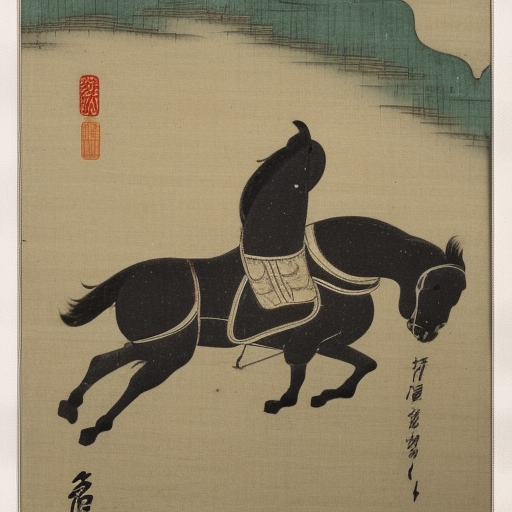

Abed, I see a silver light,


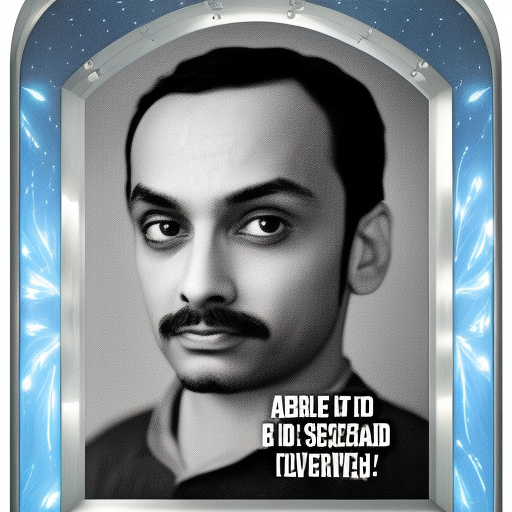

I wonder if it’s frost aground.


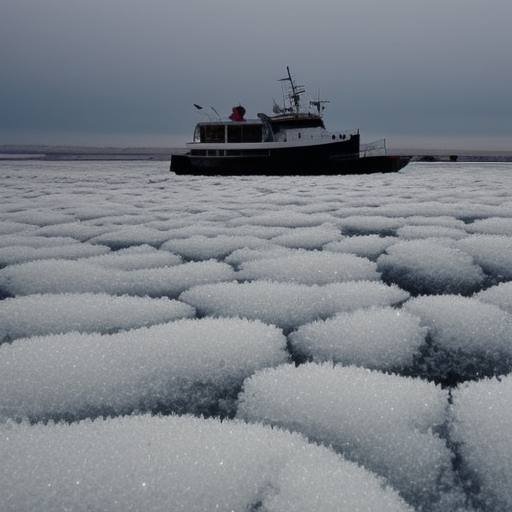

Looking up, I find the moon bright.


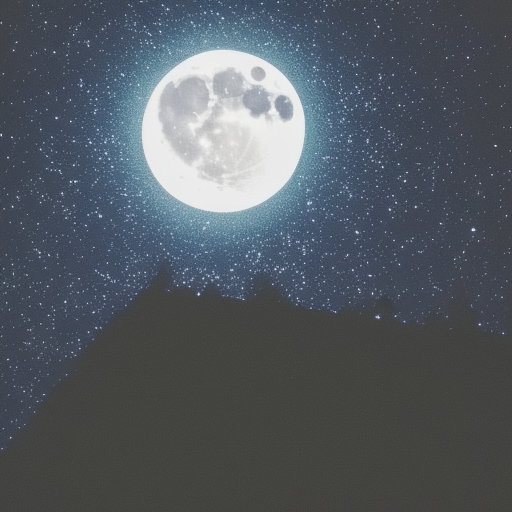

Bowing, in homesickness I’m drowned.


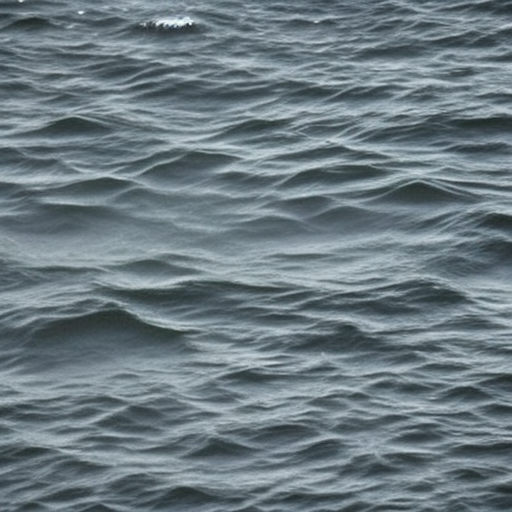

In [6]:
for i in range(len(l)):
    img = sd_generate(l[i])
    
    # save the file
    image_file = imageDir / (str(i)+'.png')
    img.save(image_file) 
    
    print(l[i])
    display(img)